# TWO:

### 1) Extract reviews of any product from ecommerce website like amazon

### 2) Perform emotion mining

 

In [2]:
import pandas as pd
import string
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [3]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re #

## One Plus Mobile Reviews

In [4]:
# creating empty reviews list 
oneplus_reviews=[]

In [5]:
for i in range (1,40):
    oneplus=[]
    url ="https://www.amazon.in/OnePlus-Mirror-Black-128GB-Storage/product-reviews/B085J19V4P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser") # Creating soup object to iterate over the extracted content
    reviews = soup.findAll("span", attrs = {"class","a-size-base review-text review-text-content"}) # Extracting the content under specific tags
    for i in range(len(reviews)):
        oneplus.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+oneplus # Adding the reviews of one page to empty list which in future contains all the reviews

In [6]:
# writng reviews in a text file 
with open("oneplus.txt","w",encoding='utf8') as output:
    output.write(str(oneplus_reviews))

In [7]:
# Joinining all the reviews into single paragraph 
op_rev_string = " ".join(oneplus_reviews)

## Using stop txt file for STOPWORDS

In [8]:
stop_words = stopwords.words('english')
with open("F:/ExcelR workings/Assignments/Text Mining/stop.txt","r") as sw:
    stopwords = sw.read()

In [9]:
stopwords = stopwords.split("\n")

In [12]:
tokenize_sent = sent_tokenize(op_rev_string)

In [13]:
from nltk.stem import WordNetLemmatizer

In [14]:
wordnet = WordNetLemmatizer()

In [18]:
filtered_split=[]
for i in range(len(tokenize_sent)):
    review = re.sub("[^A-Za-z" "]+"," ", tokenize_sent[i])
    review = re.sub("[0-9" "]+"," ", tokenize_sent[i])
    review = re.sub(r'[^\w]', " ", tokenize_sent[i])
    review =review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    filtered_split.append(review)

In [19]:
filtered_split

['ranting review friendly advice save money time oneplus 6 upgrading oneplus 8t',
 'wanted experience improved performance high quality display 120hz refresh rate talking problem oneplus 8t display',
 'oneplus 8t gonna screen issue straight box reference keywords google research oneplus purple tint oneplus black crush oneplus ghostingmine purple tint remember phone 8 year back poorly made screen looked sharp front tilt extent colour washed happening phone brightness 30 screen brightness tube light',
 'increase decrease screen brightness toggle notification panel time respond change increase brightness 30 70 good half respond change',
 'increasing brightness device instant device sadly phone price point competition screen quality lastly highly recommend reading google review buying product',
 '1',
 'call recording feature2',
 'zoom nightmode3',
 'pro mode video4',
 '120 fps option slow motion5',
 'charging take 1hr',
 'fast charging 6',
 'camera output full shadow dark region 7',
 'opti

In [57]:
len(filtered_split)

4573

## Emotion Mining

In [58]:
sent_df = pd.DataFrame(filtered_split, columns=['sentence'])
sent_df

,sentence
0,ranting review friendly advice save money time...
1,wanted experience improved performance high qu...
2,oneplus 8t gonna screen issue straight box ref...
3,increase decrease screen brightness toggle not...
4,increasing brightness device instant device sa...
...,...
4568,weak part phone rest thing phone soo good came...
4569,good camera honorable mention dear oneplus ve ...
4570,thing mandatory phone flagship wireless chargi...
4571,hope hear include 2 major check point coming m...


In [59]:
# Sentiment analysis
afinn=pd.read_csv('F:/ExcelR workings/python/Afinn.csv', sep=',', encoding=('latin-1'))

In [60]:
affinity_scores=afinn.set_index('word')['value'].to_dict()

In [61]:
nlp = spacy.load('en_core_web_sm')

In [62]:
# Custom function: score each word in a sentence in lemmatised form,
# but calculate the score for the whole orignal sentence.
sentiment_lexicon=affinity_scores

def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+= sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [63]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [64]:
# how many words are in the sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    12
1    15
2    44
3    18
4    20
5     1
6     3
7     2
8     3
9     5
Name: word_count, dtype: int64

In [65]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
4572,worst mobileshame oneplusworst display quality...,-3,26
4301,phone 50k wireless charging ip68 note camera bad,-3,8
4097,16 mp front cam bad job pic distance timer mode,-3,10
1938,16 mp front cam bad job pic distance timer mode,-3,10
4313,bad fall competition price segment,-3,5
...,...,...,...
3710,dont spend time pro great performance speed sd...,10,44
1170,dont spend time pro great performance speed sd...,10,44
1043,dont spend time pro great performance speed sd...,10,44
3964,dont spend time pro great performance speed sd...,10,44


In [66]:
sentiment = []
for i in range(len(sent_df)):
  c = sent_df.iloc[i]['sentiment_value']
  if c>0:
    sentiment.append("+ve")
  elif c<0:
    sentiment.append("-ve")
  else:
    sentiment.append("Neutral")
sent_df['Sentiment']=sentiment
sent_df

,sentence,sentiment_value,word_count,Sentiment
0,ranting review friendly advice save money time...,1,12,+ve
1,wanted experience improved performance high qu...,1,15,+ve
2,oneplus 8t gonna screen issue straight box ref...,2,44,+ve
3,increase decrease screen brightness toggle not...,7,18,+ve
4,increasing brightness device instant device sa...,2,20,+ve
...,...,...,...,...
4568,weak part phone rest thing phone soo good came...,-1,14,-ve
4569,good camera honorable mention dear oneplus ve ...,7,23,+ve
4570,thing mandatory phone flagship wireless chargi...,1,23,+ve
4571,hope hear include 2 major check point coming m...,2,9,+ve


<AxesSubplot:>

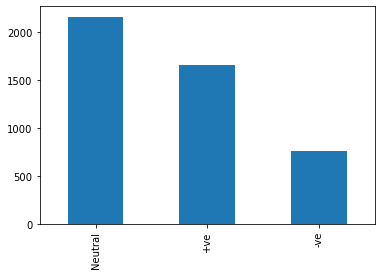

In [67]:
# ploting for comparison
sent_df['Sentiment'].value_counts().plot(kind='bar')

## TG-IDF Vectorizer

In [20]:
v=TfidfVectorizer()
text_v= v.fit_transform(filtered_split)
feature_names = v.get_feature_names()
dense = text_v.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = feature_names)

In [21]:
df

,10,100,10battery,10camera,10charging,10go,10overall,10performance,10software,10sound,...,wide,wireless,wisely,word,worry,worst,year,yesterday,zen,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.135356,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.198114,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [22]:
cloud = ",".join(df)

In [23]:
cloud

'10,100,10battery,10camera,10charging,10go,10overall,10performance,10software,10sound,11,120,120hz,128,12gb,15,16,16th,1hr,1st,20,200,2g,2nd,30,3k,40,45k,46k,4g,50k,5g,60,6tor,70,7t,865,8t,8tother,account,acko,acted,add,adding,addition,additional,advice,advisable,airtel,aka,aluminium,amazing,amazon,amoled,amount,android,angle,annoying,app,applied,apply,approx,apps,aquamarine,artificial,atleast,atleastbetter,atleastnot,atmos,auto,automatically,awesome,back,backlash,backup,bad,base,based,basic,battery,began,big,bit,black,blue,body,bothered,bought,box,brightness,bud,bug,buggy,built,bundling,business,buy,buying,cable,call,cam,camera,camera8,captured,case,change,charge,charger,charging,chargingrear,check,claim,classic,cloud,club,colour,colourful,coming,community,company,compare,compared,competition,complaining,con,condition,connectivity,consistently,contacs,contact,control,convert,cool,cooled,corning,cost,cover,crack,crush,curved,damage,dark,data,day,dear,decent,decrease,deeply,default,defe

# WordCloud

(-0.5, 1799.5, 1399.5, -0.5)

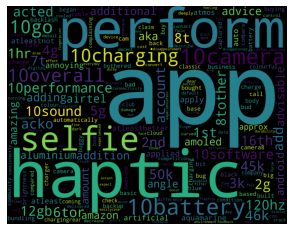

In [56]:
wordcloud= WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(cloud)
plt.imshow(wordcloud)
plt.axis("off")

## Using postive words txt file for +ve WordCloud

In [38]:
##For positive world cloud 
with open("F:/ExcelR workings/Assignments/Text Mining/positive-words.txt","r") as pve:
  pvewords = pve.read().split("\n")

In [42]:
pvewords = pvewords[36:]

In [43]:
pvewords

['adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'affordably',
 'afordable',
 'agile',
 'agilely',
 'agility',
 'agreeable',
 'agreeableness',
 'agreeably',
 'all-around',
 'alluring',
 'alluringly',
 'altruistic',
 'altruistically',
 'amaze',
 'amazed',
 'amazement',
 'amazes',
 'amazing',
 'amazingly',
 'ambitious',
 'ambitiously',
 'ameliorate',
 'amenable',
 'amenity',
 'amiability',
 'amiabily',
 'amiable',
 'amicability'

In [51]:
op_pve = ' '.join([w for w in df if w in pvewords])

In [71]:
op_pve

'amazing awesome classic consistently cool decent excellent fast fine friendly good gorgeous great heaven honorable improved improvement integrated nice patience perfect pretty proper properly protection recommend refined refresh sharp smoother super top upgraded variety warm wellbeing wisely'

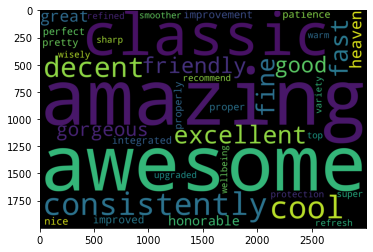

In [54]:
wordcloud_pve = WordCloud(background_color = 'black',
                           width =3000,
                           height =2000).generate(op_pve)
plt.imshow(wordcloud_pve)

## Using negative words txt file for -ve WordCloud

In [45]:
##For negative world cloud 
with open("F:/ExcelR workings/Assignments/Text Mining/negative-words.txt","r") as nve:
  nvewords = nve.read().split("\n")

In [49]:
nvewords = nvewords[37:]

In [50]:
nvewords

['acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',
 'aggravating',
 'aggravation',
 'aggression',
 'aggressive',
 'aggressiveness',
 'aggressor',
 'aggrieve',
 'aggrieved',
 'aggrivation',
 'aghast',
 'agonies',
 'agonize',
 'agonizing',
 'agonizingly',
 'agony',
 'aground',
 'ail',
 'ailing',
 'ailment',
 'aimless',
 'alarm',
 'alarmed',
 'alarming',
 'alarmingly',
 'alienate',
 'alienated',
 'alienation',
 'allegation',
 'allegations',
 'allege',
 'allergic',
 'allergies',
 'allergy',
 'aloof',
 'altercation',
 'ambiguity',
 'ambiguous',
 'am

In [53]:
op_nve = ' '.join([w for w in df if w in nvewords])

In [72]:
op_nve

'annoying bad bothered bug buggy cloud complaining crack crush damage dark disappointed disappointment drain error fails fall issue killer lack lag miss poor poorly problem ranting sadly slow struggle struggling unacceptable unclear unfortunate unwanted warp weak weakness worry worst'

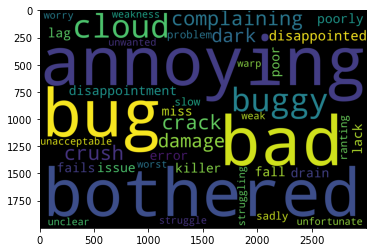

In [55]:
wordcloud_nve = WordCloud(background_color = 'black',
                           width =3000,
                           height =2000).generate(op_nve)
plt.imshow(wordcloud_nve)